In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
rcParams['font.size'] = 16.0

In [3]:
import keras.models as km

Using TensorFlow backend.


In [4]:
import h5py
import glob

In [6]:
hist_list = glob.glob("/work/06147/pberger/maverick2/saved_models/*011[0-3].history5")
#hist_list.pop(3)
hist_list = np.sort(hist_list)
hist_list

array(['/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.history5',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.history5',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.history5',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.history5'],
      dtype='|S70')

In [7]:
# Good base, generally oscillatory, get's there real quick like epoch 5 then never settles
!diff ../scripts/config_001.yaml ../scripts/config_00110.yaml

1,2c1,2
< save_model : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_001.keras'
< save_history : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_001.history5'
---
> save_model : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.keras'
> save_history : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.history5'
10c10
<     nepochs          : 25
---
>     nepochs          : 20
34c34
<         decay  : 1e-5
---
>         decay  : 1.5e-4


In [8]:
!diff ../scripts/config_001.yaml ../scripts/config_00111.yaml

1,2c1,2
< save_model : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_001.keras'
< save_history : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_001.history5'
---
> save_model : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.keras'
> save_history : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.history5'
10c10
<     nepochs          : 25
---
>     nepochs          : 20
11a12
>     gp_weight        : 20
34c35
<         decay  : 1e-5
---
>         decay  : 1.5e-4


In [9]:
!diff ../scripts/config_001.yaml ../scripts/config_00112.yaml

1,2c1,2
< save_model : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_001.keras'
< save_history : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_001.history5'
---
> save_model : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.keras'
> save_history : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.history5'
10c10
<     nepochs          : 25
---
>     nepochs          : 20
11a12
>     n_critic         : 3
34c35
<         decay  : 1e-5
---
>         decay  : 1.5e-4


In [10]:
#
!diff ../scripts/config_001.yaml ../scripts/config_00113.yaml

1,2c1,2
< save_model : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_001.keras'
< save_history : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_001.history5'
---
> save_model : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.keras'
> save_history : '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.history5'
10c10
<     nepochs          : 25
---
>     nepochs          : 20
11a12,13
>     gp_weight        : 20
>     n_critic         : 3
34c36
<         decay  : 1e-5
---
>         decay  : 1.5e-4


In [6]:
model_list1 = np.sort(glob.glob("/work/06147/pberger/maverick2/saved_models/*_001.keras*"))
model_list2 = np.sort(glob.glob("/work/06147/pberger/maverick2/saved_models/*_002.keras*"))
model_list3 = np.sort(glob.glob("/work/06147/pberger/maverick2/saved_models/*_003.keras*"))
model_list4 = np.sort(glob.glob("/work/06147/pberger/maverick2/saved_models/*_004.keras*"))

In [5]:
model_list1 = np.sort(glob.glob("/work/06147/pberger/maverick2/saved_models/*_0010.keras*"))
model_list2 = np.sort(glob.glob("/work/06147/pberger/maverick2/saved_models/*_0011.keras*"))
model_list3 = np.sort(glob.glob("/work/06147/pberger/maverick2/saved_models/*_0012.keras*"))
model_list4 = np.sort(glob.glob("/work/06147/pberger/maverick2/saved_models/*_0013.keras*"))

In [11]:
model_list1 = np.sort(glob.glob("/work/06147/pberger/maverick2/saved_models/*_00110.keras*"))
model_list2 = np.sort(glob.glob("/work/06147/pberger/maverick2/saved_models/*_00111.keras*"))
model_list3 = np.sort(glob.glob("/work/06147/pberger/maverick2/saved_models/*_00112.keras*"))
model_list4 = np.sort(glob.glob("/work/06147/pberger/maverick2/saved_models/*_00113.keras*"))

In [7]:
from kgan.net.gp_loss import *

In [8]:
import keras.losses
keras.losses.custom_loss = wasserstein_loss

In [9]:
from keras.utils.generic_utils import get_custom_objects

In [10]:
get_custom_objects().update({"wasserstein_loss": wasserstein_loss})

In [11]:
model = km.load_model(model_list1[0])

/home1/06147/pberger/.virtualenvs/tensorflow/lib/python2.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [12]:
from kgan.tools.delta import *

In [13]:
# Load the data
fp = "/work/06147/pberger/maverick2/gadget_runs/cosmo1/n512_512Mpc_cosmo1_z0_gridpart.h5"

with h5py.File(fp, 'r') as data:
    
    delta = []
    for dk in list(data.keys())[:1]:
        delta_i = squash(data[dk][:])
        delta_i = np.array(split3d(delta_i, 8))
        delta.extend(delta_i)
    delta = np.array(delta)
    
print(delta.shape)

(512, 64, 64, 64)


In [14]:
latent_dim = 100

In [66]:
mi = 0
model = km.load_model(model_list1[mi])

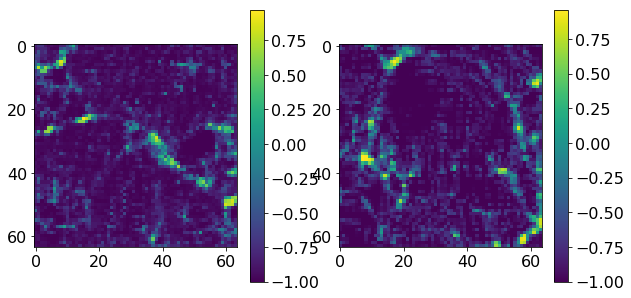

In [67]:
fig = figure(figsize = (10, 5))

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

subplot(1,2,1)
imshow(test_imgs[0, 32])
colorbar()
subplot(1,2,2)
imshow(real_imgs[0, 32])
#print(np.std(real_imgs.reshape(32, -1), axis=-1).mean(), np.mean(real_imgs.reshape(32, -1), axis=-1).mean())
#print(np.std(test_img.reshape(32, -1), axis=-1).mean(), np.mean(test_imgs.reshape(32, -1), axis=-1).mean())
colorbar()

In [15]:
def estimate_pk(kki, img, nbin=30):
    
    bins = np.linspace(np.min(kki), np.max(kki), nbin+1, endpoint=True)

    ibin = [np.logical_and(kki.ravel() >= bins[i], kki.ravel() < bins[i+1]) for i in range(nbin)]
    ibin = np.array(ibin)

    ft = abs(np.fft.fftn(img))**2
    pkk = np.array([np.mean(ft.ravel()[ibin[i]]) for i in range(nbin)])
    kk = np.array([np.mean(kki.ravel()[ibin[i]]) for i in range(nbin)])

    return kk, pkk

In [16]:
def quick_check_plot(real_imgs, test_imgs):

    fig = figure(figsize = (15, 5))

    kx = np.fft.fftfreq(64, d=0.1)
    ky = np.fft.fftfreq(64, d=0.1)
    kz = np.fft.fftfreq(64, d=0.1)
    kk = np.sqrt(kx[:, np.newaxis, np.newaxis]**2 
                 + ky[np.newaxis, :, np.newaxis]**2 
                 + kz[np.newaxis, np.newaxis, :]**2)

    pk1r = []
    pk2f = []
    for i in range(32):
        k1, pk1 = estimate_pk(kk, squash_inv(real_imgs[i]))
        k2, pk2 = estimate_pk(kk, squash_inv(test_imgs[i]))
        #k1, pk1 = estimate_pk(kk, real_imgs[i])
        #k2, pk2 = estimate_pk(kk, test_imgs[i])

        pk1r.append(pk1)
        pk2f.append(pk2)
    pk1r = np.array(pk1r)
    pk2f = np.array(pk2f)

    subplot(2,2,1)
    plot(k1, pk1r.mean(0), '-o')
    fill_between(k1, pk1r.mean(0) - pk1r.std(0), pk1r.mean(0) + pk1r.std(0), color='C0', alpha=0.1)
    plot(k2, pk2f.mean(0), '-o')
    fill_between(k2, pk2f.mean(0) - pk2f.std(0), pk2f.mean(0) + pk2f.std(0), color='C1', alpha=0.1)
    yscale('log')
    xscale('log')
    subplot(2,2,3)
    plot(k1, np.sqrt(pk2f.mean(0)/pk1r.mean(0)), '-o')
    krange = np.linspace(np.min(k1), np.max(k1), 100)
    fill_between(krange, np.ones_like(krange)*0.9, np.ones_like(krange)*1.1, color='C5', alpha=0.1)
    fill_between(krange, np.ones_like(krange)*0.95, np.ones_like(krange)*1.05, color='C5', alpha=0.2)
    axhline(1.0, ls='--', c='grey')
    xscale('log')
    ylim(0.75, 1.25)

    subplot(1,2,2)
    foo = hist((real_imgs).ravel(), bins=50, edgecolor='C0', alpha=0.1)
    foot = hist((test_imgs).ravel(), bins=50, edgecolor='C1', alpha=0.1)
    #foo = hist(squash_inv(real_imgs).ravel(), bins=50, edgecolor='C0', alpha=0.1)
    #foot = hist(squash_inv(test_imgs).ravel(), bins=50, edgecolor='C1', alpha=0.1)
    yscale('log')

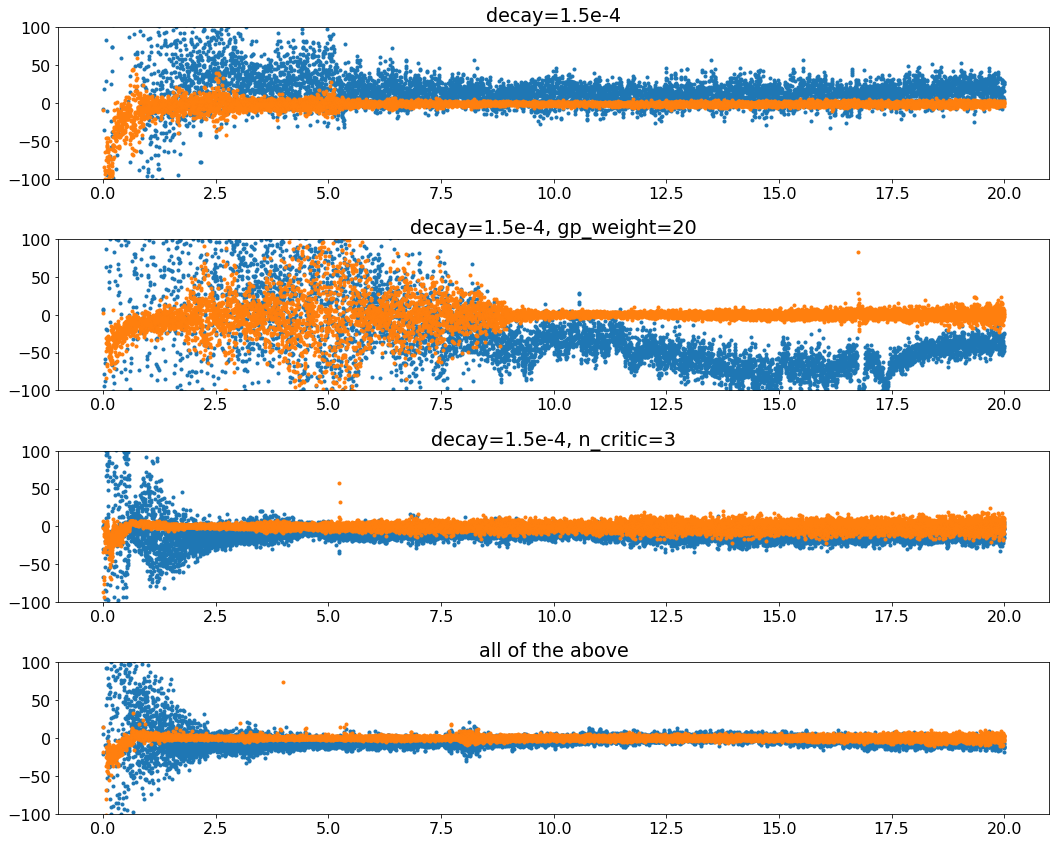

In [16]:
fig = figure(figsize = (15, 12))

titles = ['decay=1.5e-4', 'decay=1.5e-4, gp_weight=20', 'decay=1.5e-4, n_critic=3', 'all of the above']

for mi in range(4):
    subplot(4,1,1+mi)
    with h5py.File(hist_list[mi], 'r') as hfile:

        epoch = np.arange(hfile['g_loss'][:].shape[0])*20./hfile['g_loss'][:].shape[0]
        plot(epoch, hfile['d_loss'][:], '.')
        plot(epoch, hfile['g_loss'][:], '.')
        
    title(titles[mi])

    ylim(-100, 100)
    
tight_layout()

In [18]:
model_list = model_list1
print(len(model_list))
model_list

12


array(['/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.keras-005',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.keras-007',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.keras-009',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.keras-011',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.keras-012',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.keras-013',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.keras-014',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.keras-015',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.keras-016',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.keras-017',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.keras-018',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00110.keras-019'],
      dtype='|S

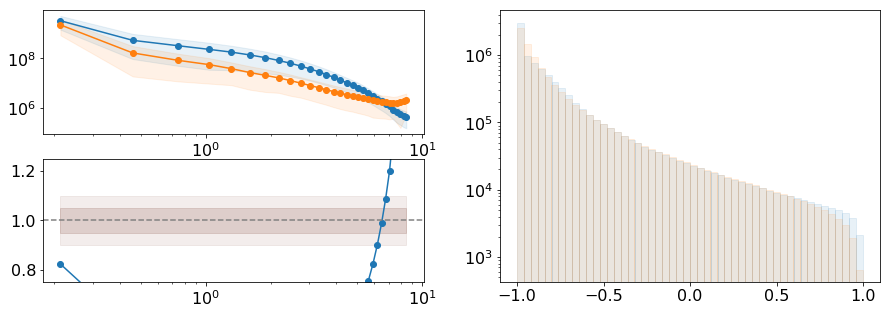

In [19]:
mi = 0
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

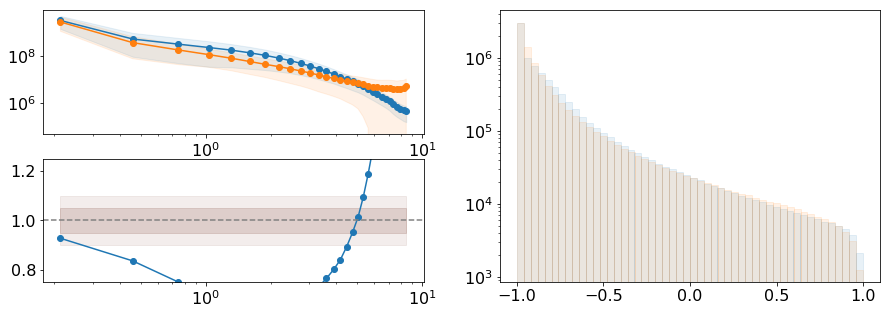

In [20]:
mi = 1
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

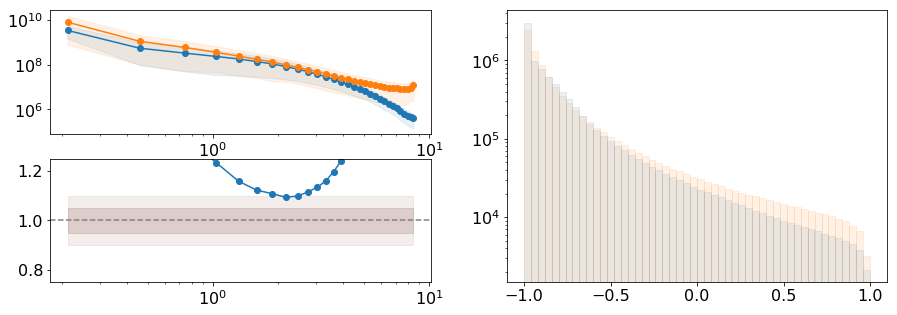

In [21]:
mi = 2
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

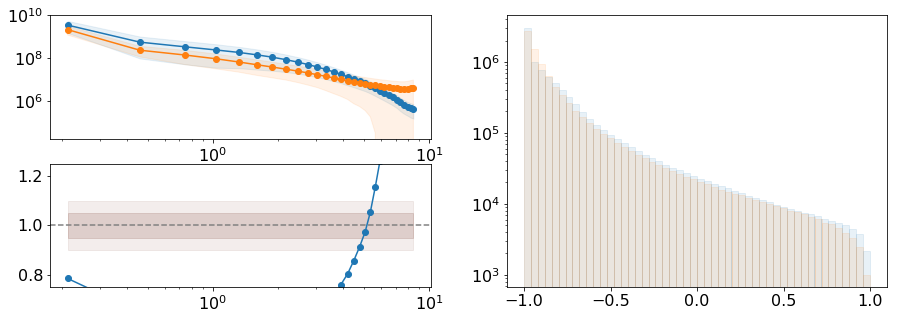

In [22]:
mi = 3
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

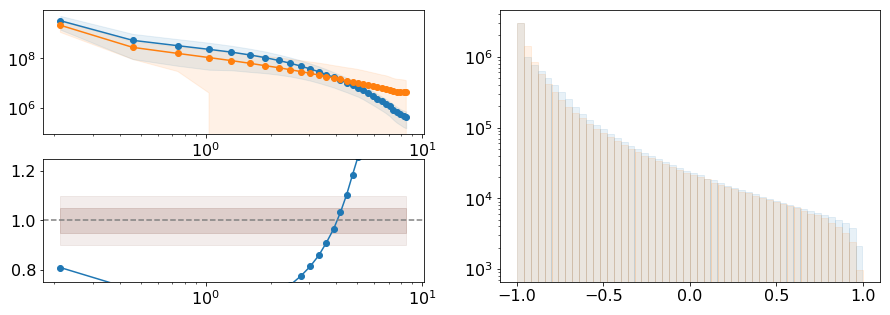

In [23]:
mi = 4
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

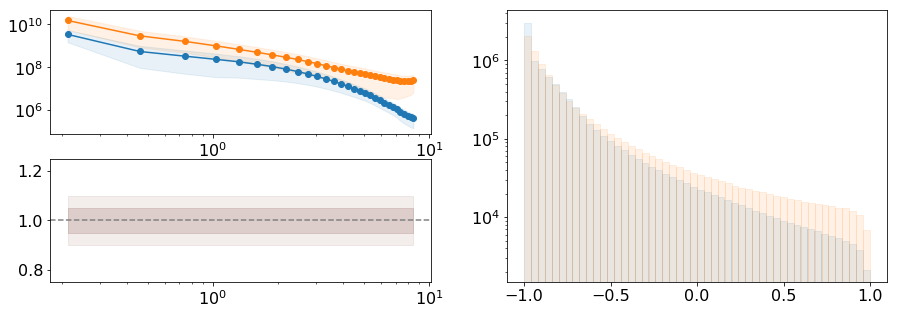

In [24]:
mi = 5
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

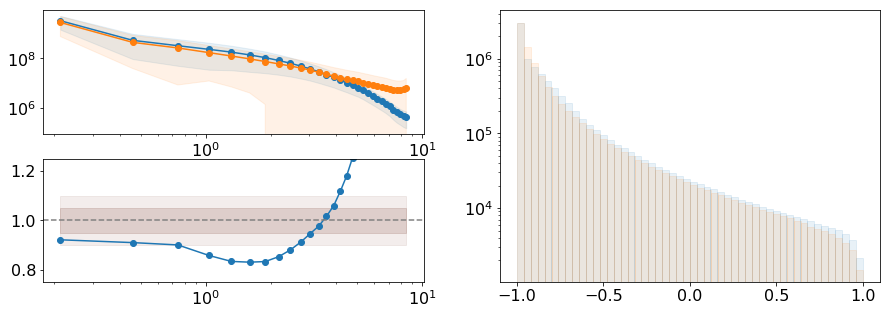

In [25]:
mi = 6
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

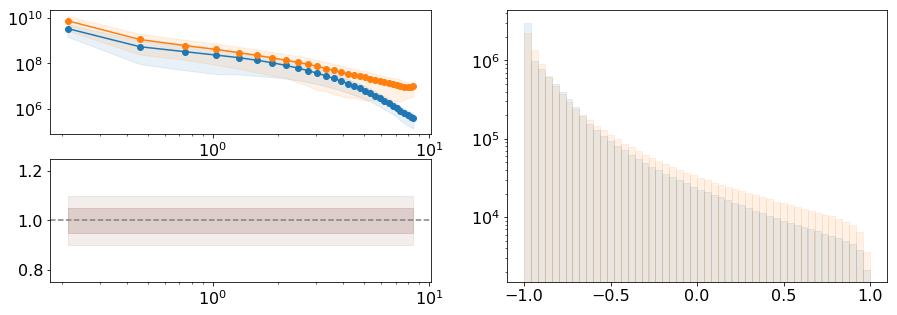

In [26]:
mi = 7
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

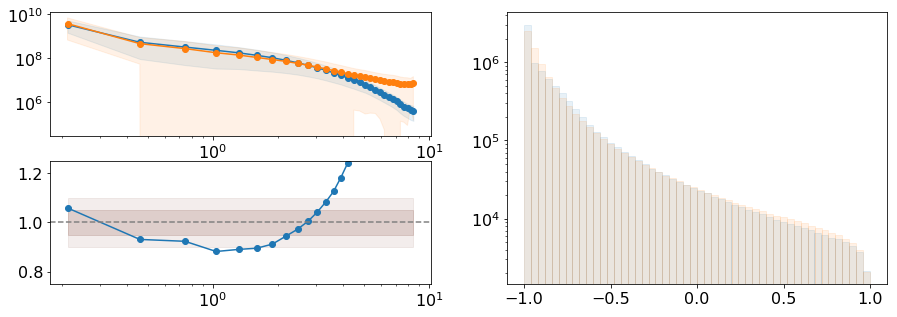

In [27]:
mi = 8
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

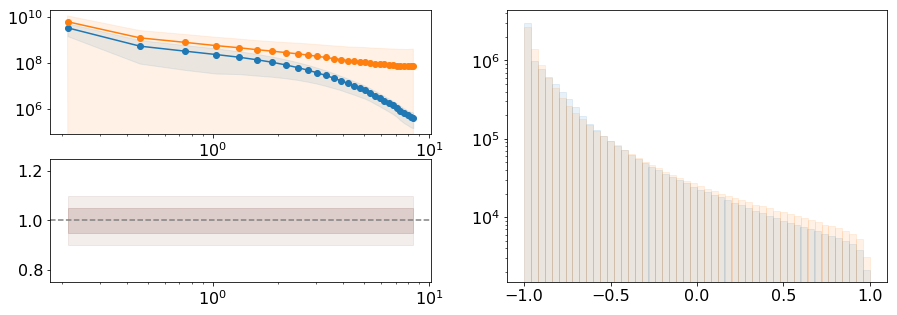

In [28]:
mi = 9
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

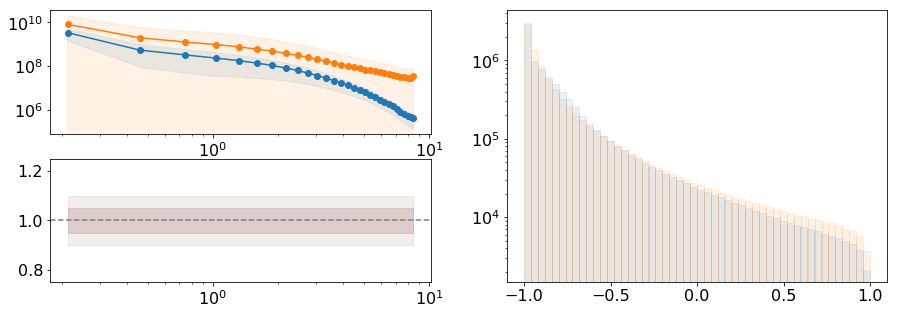

In [29]:
mi = 10
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

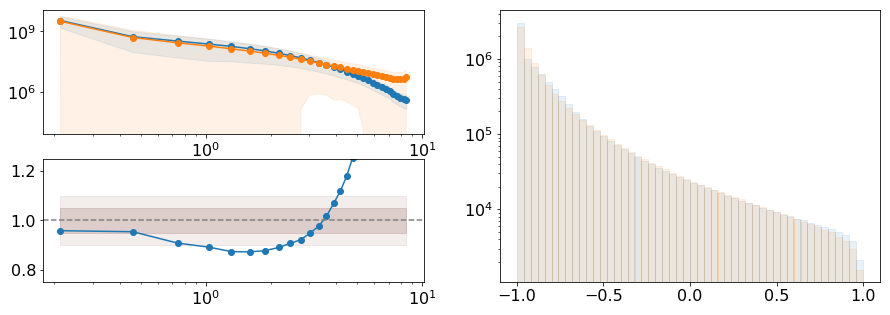

In [30]:
mi = 11
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

In [31]:
model_list = model_list2
print(len(model_list))
model_list

12


array(['/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.keras-005',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.keras-007',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.keras-009',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.keras-011',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.keras-012',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.keras-013',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.keras-014',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.keras-015',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.keras-016',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.keras-017',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.keras-018',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00111.keras-019'],
      dtype='|S

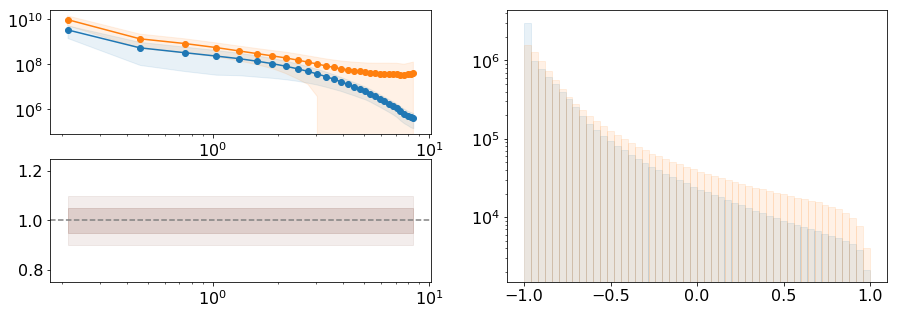

In [32]:
mi = 0
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

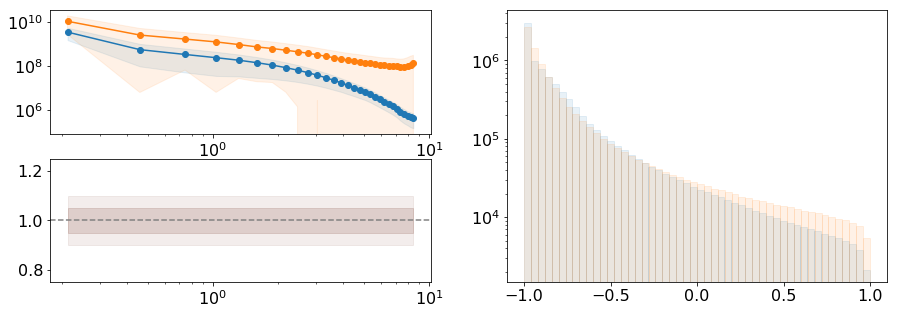

In [33]:
mi = 1
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

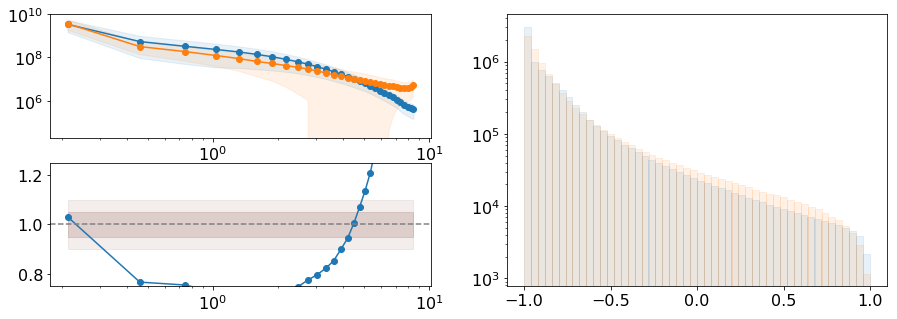

In [34]:
mi = 2
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

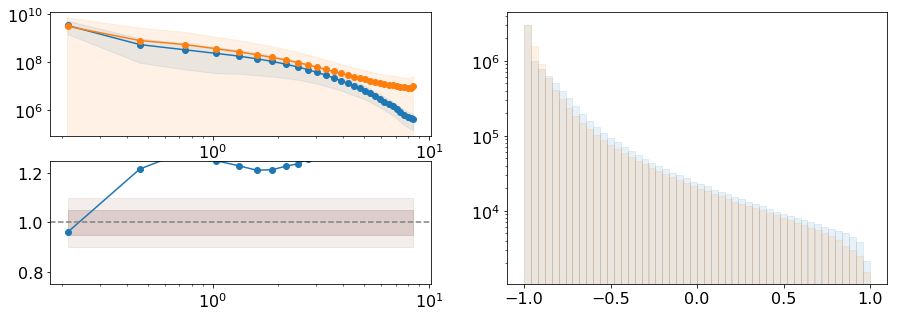

In [35]:
mi = 3
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

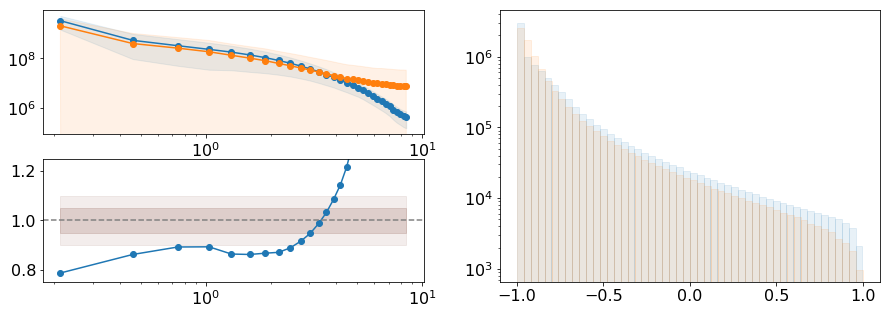

In [36]:
mi = 4
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

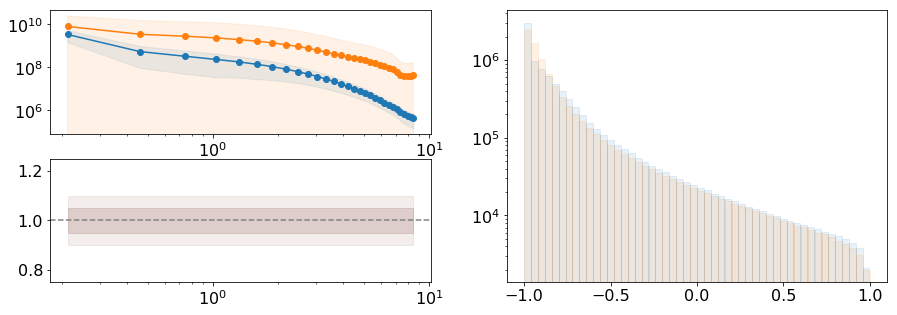

In [37]:
mi = 5
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

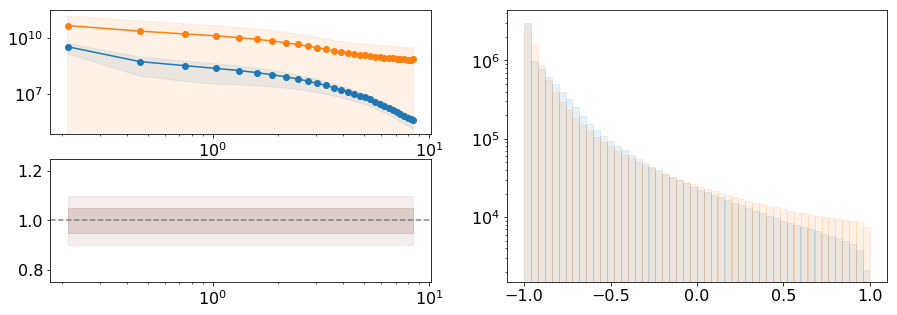

In [38]:
mi = 6
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

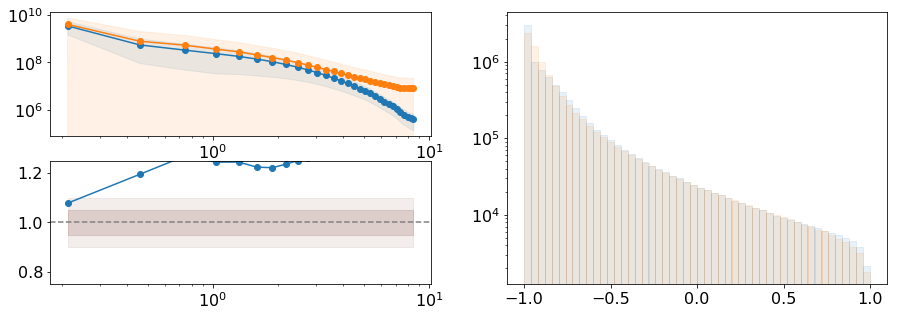

In [39]:
mi = 7
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

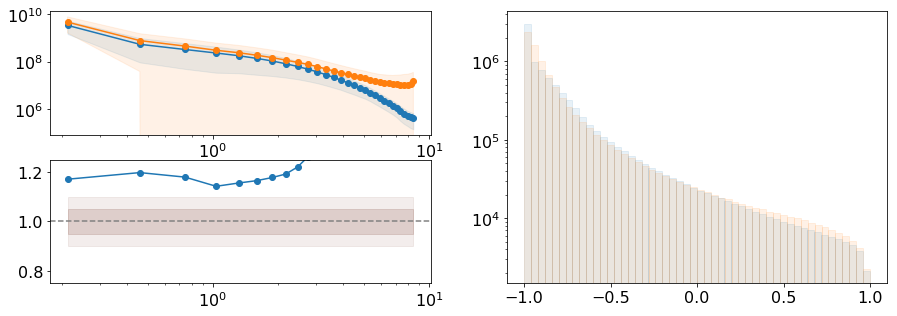

In [40]:
mi = 8
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

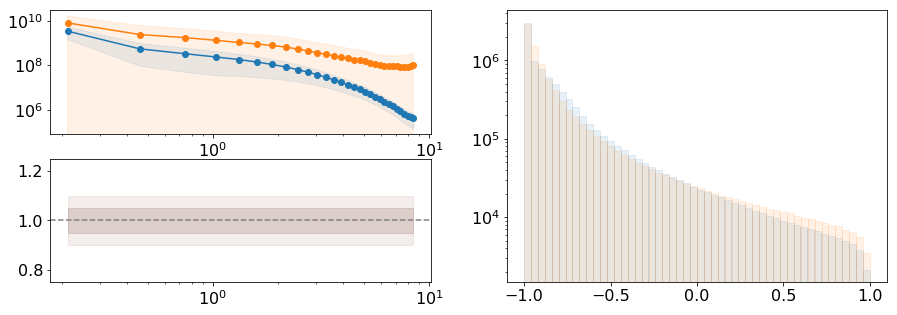

In [41]:
mi = 9
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

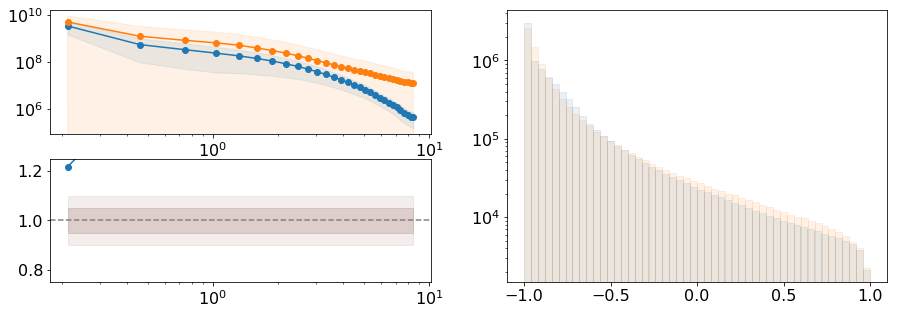

In [42]:
mi = 10
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

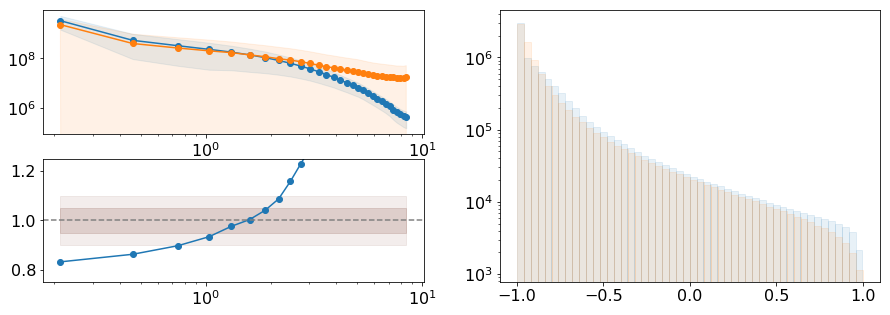

In [43]:
mi = 11
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

In [57]:
model_list = model_list3
print(len(model_list))
model_list

12


array(['/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.keras-005',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.keras-007',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.keras-009',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.keras-011',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.keras-012',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.keras-013',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.keras-014',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.keras-015',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.keras-016',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.keras-017',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.keras-018',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00112.keras-019'],
      dtype='|S

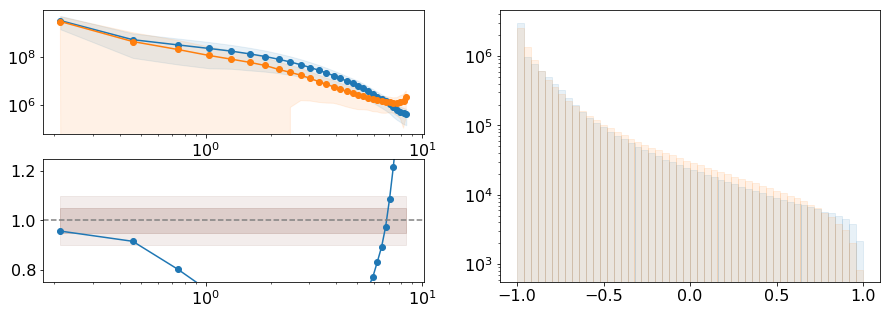

In [58]:
mi = 0
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

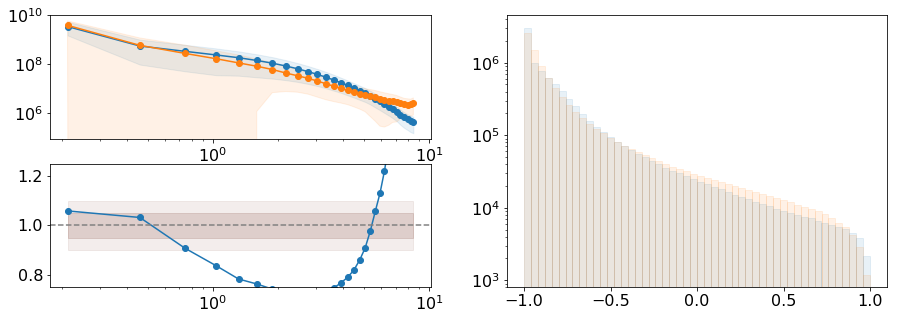

In [59]:
mi = 1
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

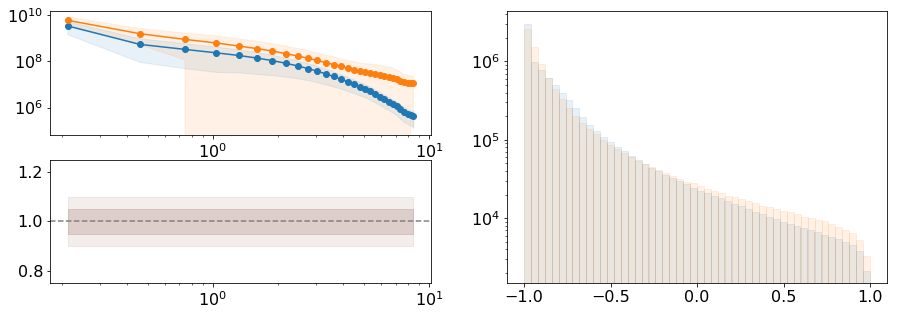

In [60]:
mi = 2
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

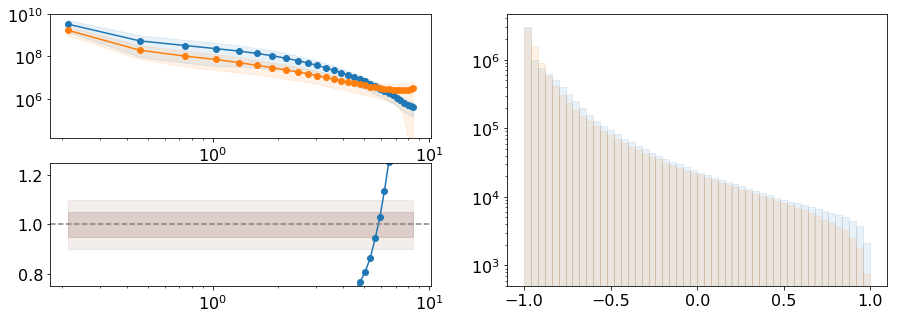

In [61]:
mi = 3
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

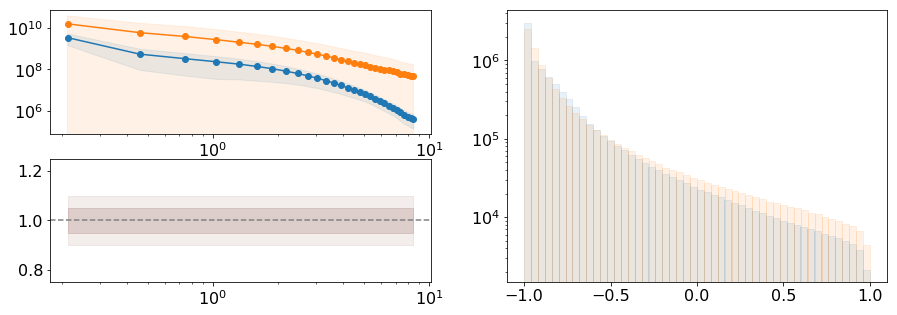

In [62]:
mi = 4
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

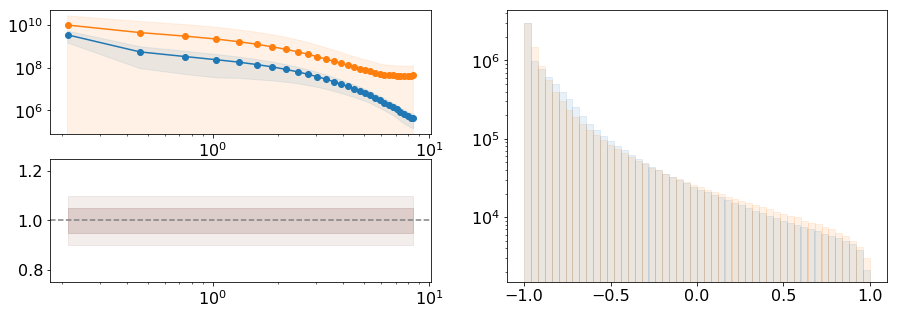

In [63]:
mi = 5
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

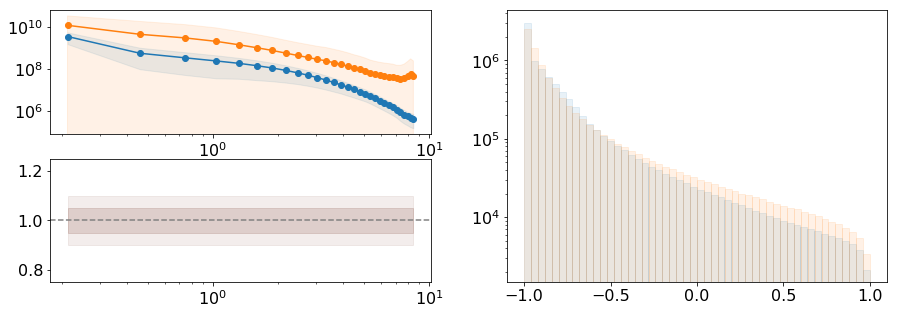

In [64]:
mi = 6
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

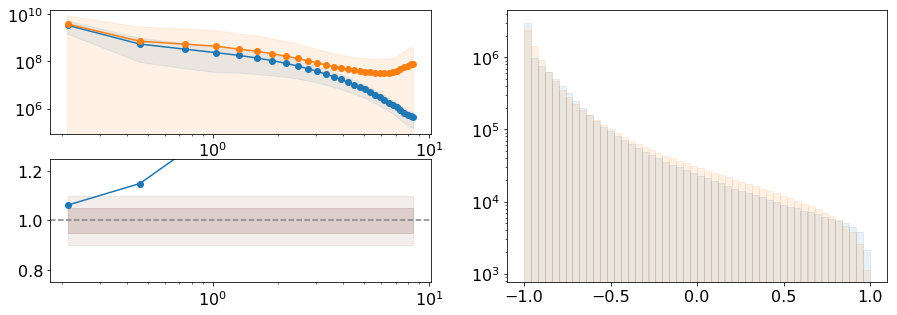

In [65]:
mi = 7
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

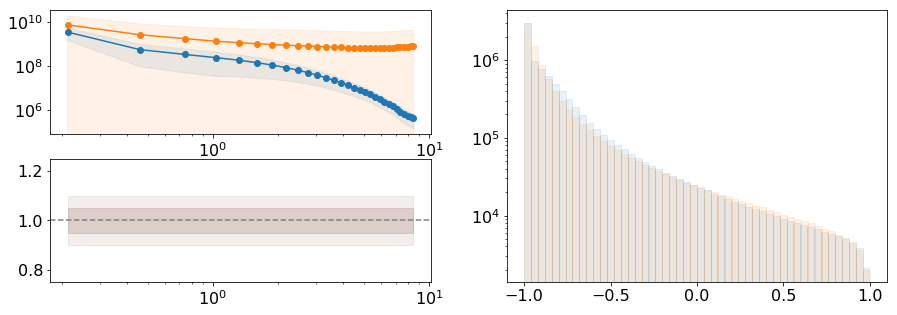

In [66]:
mi = 8
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

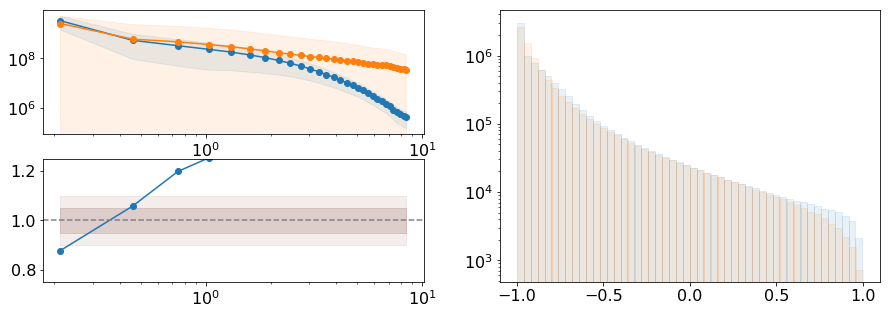

In [67]:
mi = 9
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

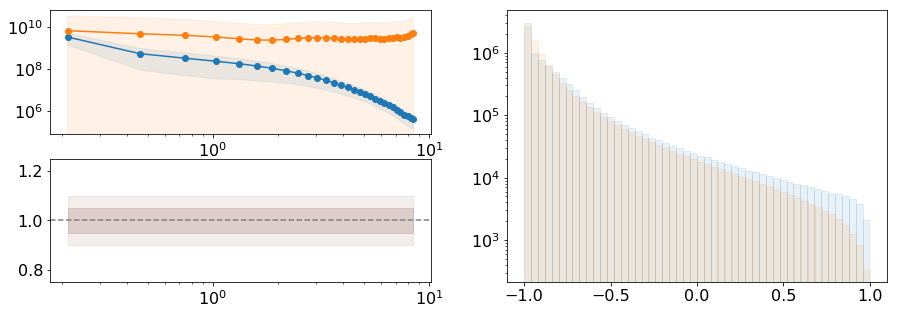

In [68]:
mi = 10
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

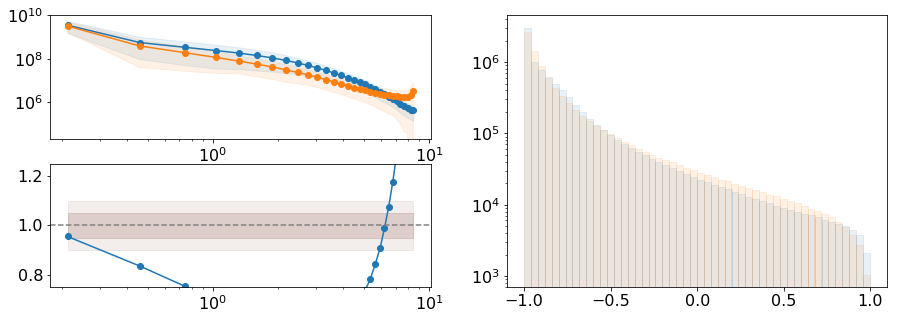

In [69]:
mi = 11
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

In [44]:
model_list = model_list4
print(len(model_list))
model_list

12


array(['/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.keras-005',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.keras-007',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.keras-009',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.keras-011',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.keras-012',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.keras-013',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.keras-014',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.keras-015',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.keras-016',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.keras-017',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.keras-018',
       '/work/06147/pberger/maverick2/saved_models/gen_resnet3d_00113.keras-019'],
      dtype='|S

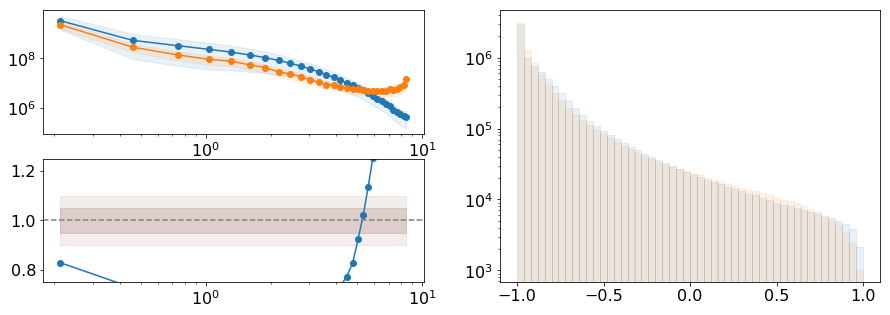

In [45]:
mi = 0
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

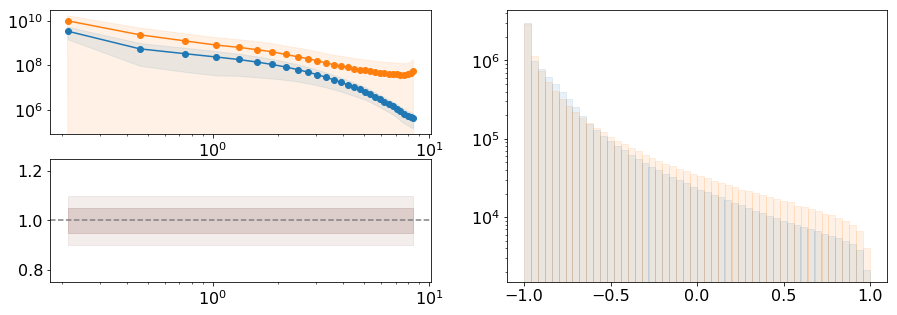

In [46]:
mi = 1
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

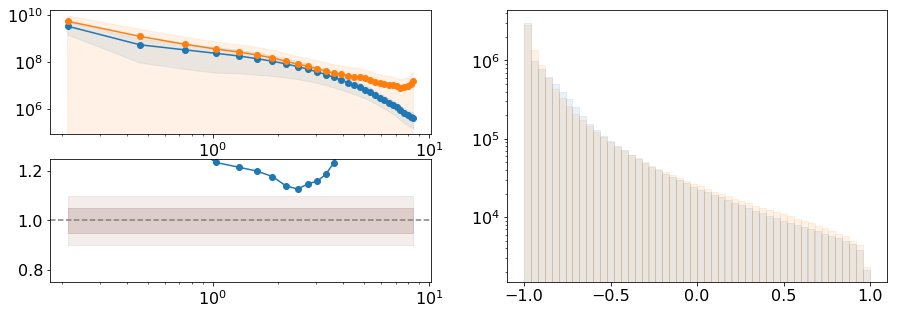

In [47]:
mi = 2
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

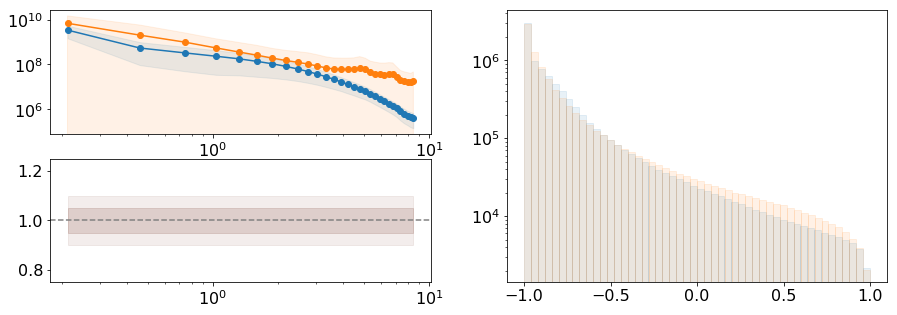

In [48]:
mi = 3
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

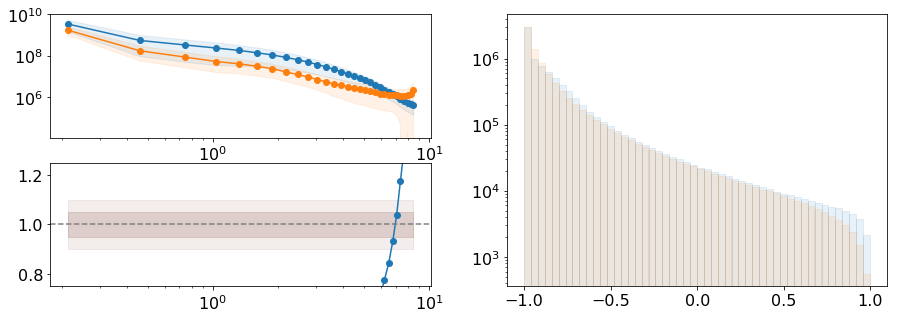

In [49]:
mi = 4
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

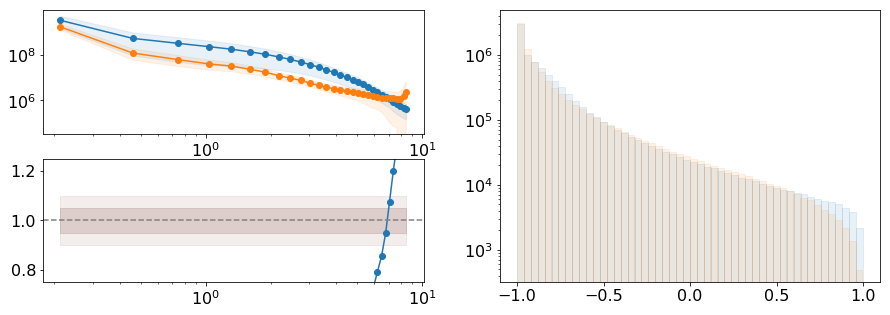

In [50]:
mi = 5
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

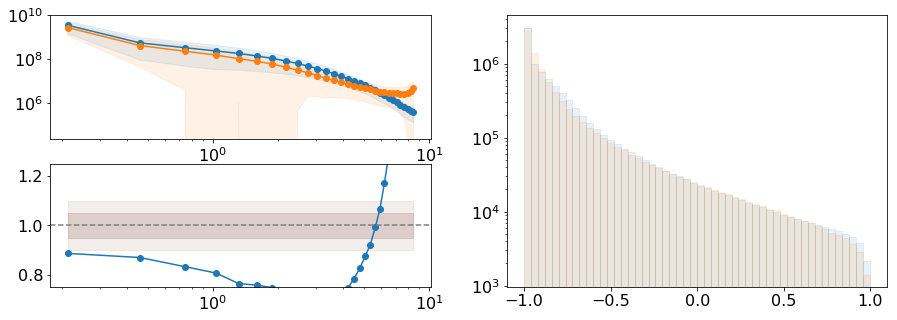

In [51]:
mi = 6
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

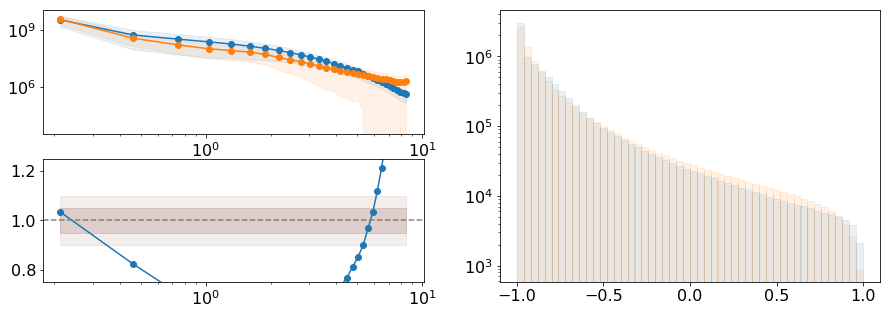

In [52]:
mi = 7
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

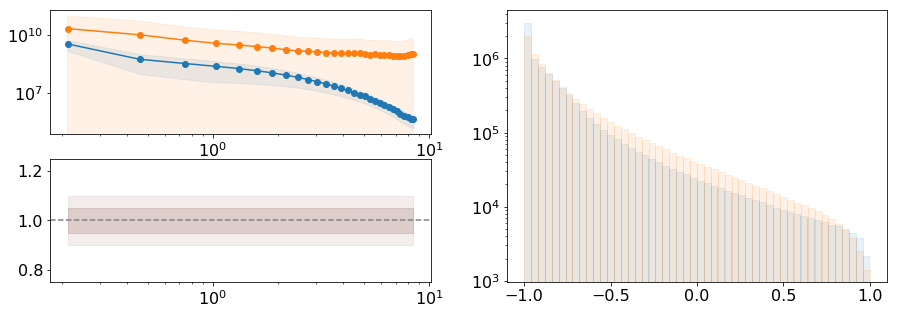

In [53]:
mi = 8
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

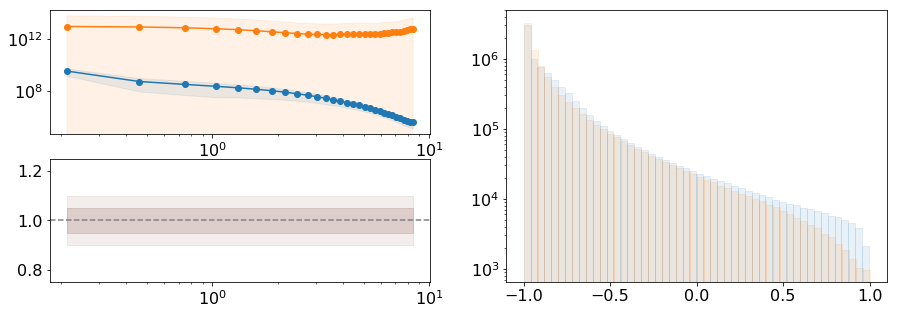

In [54]:
mi = 9
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

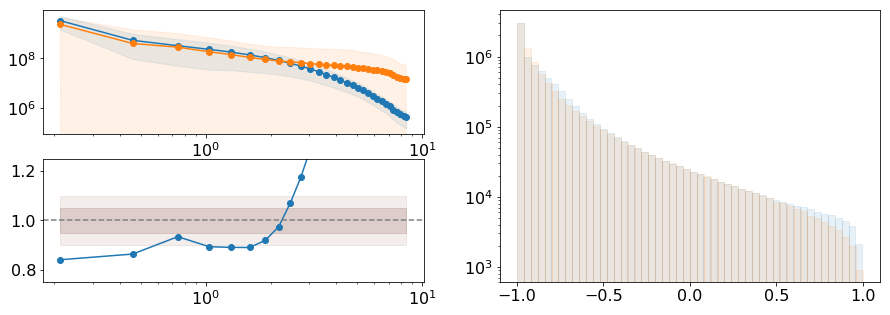

In [55]:
mi = 10
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)

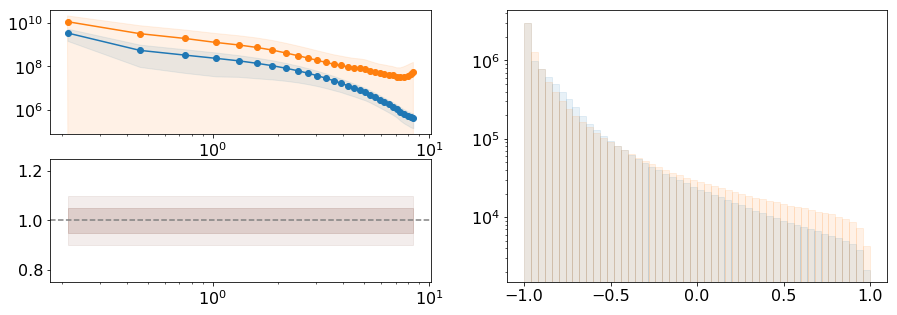

In [56]:
mi = 11
model = km.load_model(model_list[mi])

test_imgs = model.predict(np.random.normal(0, 1, (32, latent_dim))).reshape(32, 64, 64, 64)
real_imgs = delta[:32]
    
test_imgs = np.array(test_imgs)
real_imgs = np.array(real_imgs)

quick_check_plot(real_imgs, test_imgs)